# Imports

In [78]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split

# Generate random dataset

In [79]:
X = np.random.rand(5000, 28, 28, 1)  # 1000 samples, 28x28 pixels, 1 channel (grayscale)
y = np.random.randint(0, 2, 5000)  # Target: 10 classes (0-9)

# Split into train and test set 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model layers

In [81]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.3)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5042 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5153 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4982 - loss: 0.6934 - val_accuracy: 0.5033 - val_loss: 0.6931
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5163 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5138 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5075 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5565 - loss: 0.6884 - val_accuracy: 0.5275 - val_loss: 0.6920
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5890 - loss: 0.6679 - val_accuracy: 0.

# Evaluate on test set

In [83]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4969 - loss: 1.5462
Test Accuracy: 0.50


# Plot training and validation accuracy and losses

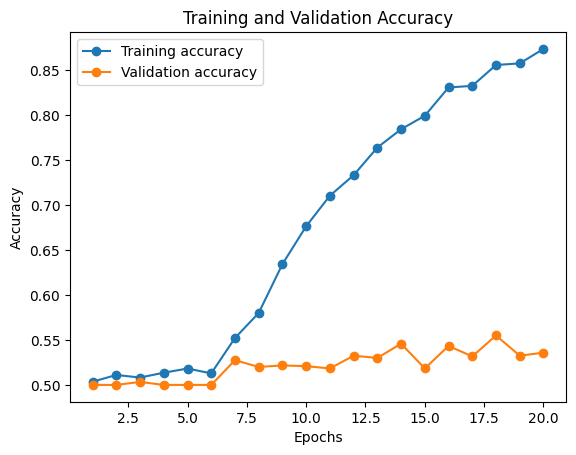

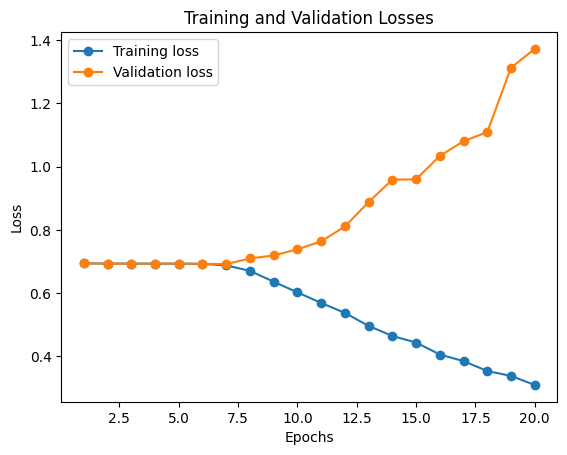

In [84]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, label='Training accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training loss', marker='o')
plt.plot(epochs, val_loss, label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()